To reproduce, make our submission folder a shortcut in your drive

In [ ]:
import os
import json
import pandas as pd
import numpy as np
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Warnings
import warnings
# Text Preprocessing and Natural Language Processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import nltk
import re
import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import missingno as msno
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md
import spacy
# Load the spaCy model
nlp = spacy.load('en_core_web_md')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 31.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set up

In [ ]:
jobs_df = pd.read_csv("/content/drive/My Drive/BT4222_Group_3_Submission/cleaned_datasets/final_jobs.csv")

In [ ]:
courses_df = pd.read_csv("/content/drive/My Drive/BT4222_Group_3_Submission/cleaned_datasets/train.csv") #Use train

In [ ]:
courses_df.shape

(82090, 14)

In [ ]:
jobs_df.shape

(1294346, 2)

In [ ]:
courses_df

,Review,Reviewer,Individual Rating,Course Name,Institution,Overall Ratings,Level,Duration,Num of Reviews,Course Skills,Description,Date,Demeaned Rating,Popularity
0,really well explained by andrew ng. the theory...,- a u s,5,neural networks and deep learning,deeplearning.ai,4.9,Intermediate level,24,120,"artificial neural network, backpropagation, py...",This specialization gives participants broad s...,2020-05-11,0.00,588.0
1,absolutely insightful from the perspective of ...,- a u s,5,improving deep neural networks: hyperparameter...,deeplearning.ai,4.9,Intermediate level,23,62,"tensorflow, deep learning, hyperparameter tuni...",In the second course of the Deep Learning Spec...,2020-05-25,0.00,303.8
2,this course is useful for beginners. i was int...,.,5,neural networks and deep learning,deeplearning.ai,4.9,Intermediate level,24,120,"artificial neural network, backpropagation, py...",This specialization gives participants broad s...,2020-04-03,0.00,588.0
3,thats the most complicated course in the speci...,.,5,sequence models,deeplearning.ai,4.8,Intermediate level,29,29,"gated recurrent unit gru, recurrent neural net...",\n In the fifth course of the Deep Learning S...,2020-04-03,0.00,139.2
4,exceptional,01fe18bec055,5,what is data science?,ibm,4.7,Beginner level,11,67,", data science, big data, machine learning, de...",\n Define data science and its importance in ...,2019-08-29,0.00,314.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82085,a very good course that matched my expectation...,zvinodashe m,5,data-driven decision making,pwc,4.6,Beginner level,9,6,"data-informed decision-making, big data, data ...",One of the most important skills of successful...,2017-02-03,0.00,27.6
82086,i find the introductory course into data scien...,zvonimir k,5,what is data science?,ibm,4.7,Beginner level,11,67,", data science, big data, machine learning, de...",\n Define data science and its importance in ...,2019-02-21,0.00,314.9
82087,good introductory course to open source tools,zvonimir k,5,tools for data science,ibm,4.5,Beginner level,18,27,"data science, python programming, github, rstu...",Describe the Data Scientist’s tool kit which i...,2019-02-24,0.00,121.5
82088,"quite a fast-paced course, with very quick and...",zw,4,introduction to data science in python,university of michigan,4.5,Intermediate level,34,26,"python programming, numpy, pandas, data cleans...",Understand techniques such as lambdas and mani...,2016-12-27,-0.25,117.0


In [ ]:
jobs_df

,Job Skills,Job Title
0,"building custodial services, cleaning, janitor...",housekeeper i - pt
1,"customer service, restaurant management, food ...",assistant general manager - huntington 4131
2,"applied behavior analysis aba, data analysis, ...",school-based behavior analyst
3,"electrical engineering, project controls, sche...",electrical deputy engineering group supervisor
4,"electrical assembly, point to point wiring, st...",electrical assembly lead
...,...,...
1294341,"communication skills, time management, custome...",community ambassador - the station at raleigh
1294342,"windows sql, edi x12, edifecs platform, health...",sr. it analyst - edifecs technical systems ana...
1294343,"adaptability, communication, digital fluency, ...",operations excellence specialist
1294344,"cna, emt, bls, medical assistant, cpct, lpn, r...",float patient care associate cso ynhh


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
job_skills_matrix = vectorizer.fit_transform(jobs_df['Job Skills'])

Elbow Method with MiniBatchKMeans

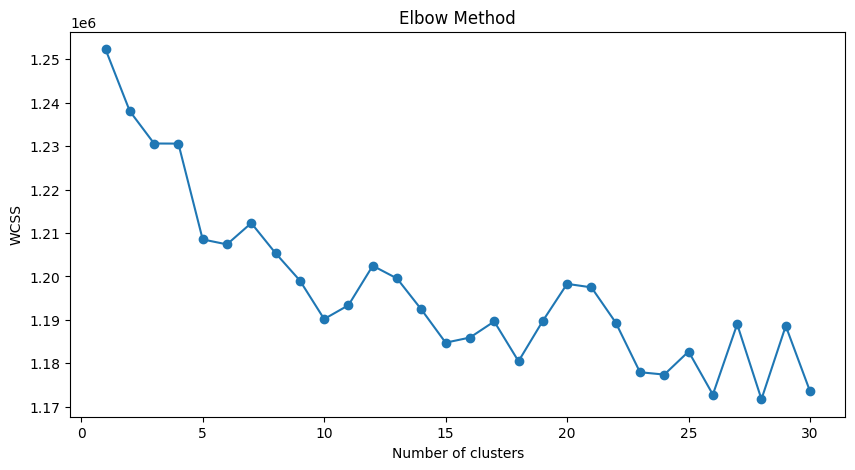

In [ ]:
from sklearn.cluster import MiniBatchKMeans
X = job_skills_matrix

# Elbow Method with MiniBatchKMeans
wcss = []
for i in range(1, 31):  # Test k from 1 to 30
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=100, max_iter=150, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying Domain Knowledge**

Based on the Elbow Method graph, there isn't a clearly defined "elbow" which can sometimes be the case in practice. The curve is quite smooth and the decrease in WCSS is fairly consistent across the number of clusters.

We anticipate a broad range of distinct skills, therefore we opt for a larger number of clusters to capture these nuances.

 Given the diversity of job roles and industries represented in the dataset, we require more clusters to effectively separate distinct skill sets. For instance, the skill sets for 'Data Analysis' and 'Web Development' could be quite different, and we do not want them clustered together.

 Additionally, given the Course Content Complexity: Courses may range from very specialized to very general. Specialized courses (like "Advanced Neural Network Techniques") may need to be clustered separately from more general ones (like "Introduction to Programming").

 However, we also took into account the overlap of Skills: Some skills will be common across various jobs (e.g., "teamwork" or "communication"), so not every unique skill justifies a separate cluster. Similarly, while there may be many jobs, they might fall into several broad categories (e.g., IT, marketing, administration, etc.). Within these categories, the differentiation might not be as vast.

Therefore we have decided to set the number of clusters to be 20.

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters (k) here, using methods like the Elbow method
num_clusters = 20  # Adjust this based on domain knowledge and analysis such as the Elbow method
kmeans_jobs = KMeans(n_clusters=num_clusters, random_state=42)
jobs_df['Cluster'] = kmeans_jobs.fit_predict(job_skills_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# # Function to clean and deduplicate skills
def clean_and_deduplicate_skills(skill_data):
    if isinstance(skill_data, list):  # Check if the input is already a list
        unique_skills = list(set(skill_data))  # Remove duplicates
        return unique_skills
    elif isinstance(skill_data, str):  # Check if the input is a string
        skill_list = skill_data.split(',')
        skill_list = [skill.strip() for skill in skill_list if skill.strip()]  # Clean spaces and remove empty strings
        unique_skills = list(set(skill_list))  # Remove duplicates
        return unique_skills
    else:
        return []  # Return an empty list for NaN or other data types

# Apply the function to the 'Course Skills' column
courses_df['Course Skills'] = courses_df['Course Skills'].apply(clean_and_deduplicate_skills)

# Display the updated DataFrame to verify the changes
print(courses_df[['Course Name', 'Course Skills']].head())

                                         Course Name  \
0                  neural networks and deep learning   
1  improving deep neural networks: hyperparameter...   
2                  neural networks and deep learning   
3                                    sequence models   
4                              what is data science?   

                                       Course Skills  
0  [computational logic, deep learning, neural ne...  
1  [algorithms, deep learning, artificial neural ...  
2  [computational logic, deep learning, neural ne...  
3  [gated recurrent unit gru, recurrent neural ne...  
4  [deep learning, data science, data mining, big...  


In [ ]:
courses_df

,Review,Reviewer,Individual Rating,Course Name,Institution,Overall Ratings,Level,Duration,Num of Reviews,Course Skills,Description,Date,Demeaned Rating,Popularity
0,really well explained by andrew ng. the theory...,- a u s,5,neural networks and deep learning,deeplearning.ai,4.9,Intermediate level,24,120,"[computational logic, deep learning, neural ne...",This specialization gives participants broad s...,2020-05-11,0.00,588.0
1,absolutely insightful from the perspective of ...,- a u s,5,improving deep neural networks: hyperparameter...,deeplearning.ai,4.9,Intermediate level,23,62,"[algorithms, deep learning, artificial neural ...",In the second course of the Deep Learning Spec...,2020-05-25,0.00,303.8
2,this course is useful for beginners. i was int...,.,5,neural networks and deep learning,deeplearning.ai,4.9,Intermediate level,24,120,"[computational logic, deep learning, neural ne...",This specialization gives participants broad s...,2020-04-03,0.00,588.0
3,thats the most complicated course in the speci...,.,5,sequence models,deeplearning.ai,4.8,Intermediate level,29,29,"[gated recurrent unit gru, recurrent neural ne...",\n In the fifth course of the Deep Learning S...,2020-04-03,0.00,139.2
4,exceptional,01fe18bec055,5,what is data science?,ibm,4.7,Beginner level,11,67,"[deep learning, data science, data mining, big...",\n Define data science and its importance in ...,2019-08-29,0.00,314.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82085,a very good course that matched my expectation...,zvinodashe m,5,data-driven decision making,pwc,4.6,Beginner level,9,6,"[business process management, data visualizati...",One of the most important skills of successful...,2017-02-03,0.00,27.6
82086,i find the introductory course into data scien...,zvonimir k,5,what is data science?,ibm,4.7,Beginner level,11,67,"[deep learning, data science, data mining, big...",\n Define data science and its importance in ...,2019-02-21,0.00,314.9
82087,good introductory course to open source tools,zvonimir k,5,tools for data science,ibm,4.5,Beginner level,18,27,"[rstudio, data science, jupyter notebooks, pyt...",Describe the Data Scientist’s tool kit which i...,2019-02-24,0.00,121.5
82088,"quite a fast-paced course, with very quick and...",zw,4,introduction to data science in python,university of michigan,4.5,Intermediate level,34,26,"[data cleansing, numpy, pandas, python program...",Understand techniques such as lambdas and mani...,2016-12-27,-0.25,117.0


In [ ]:
import random

def select_random_user(user_skills_df):
    # Randomly select a user from the user skills dataframe
    random_user_index = random.randint(0, len(user_skills_df) - 1)
    random_user_id = user_skills_df.iloc[random_user_index]['Reviewer']
    random_user_skills = user_skills_df.iloc[random_user_index]['Course Skills']
    return random_user_id, random_user_skills

In [ ]:
# Aggregate user skills by grouping course data by users
# courses_df['Course Skills'] = courses_df['Course Skills'].apply(lambda x: x.split(', '))  # Split skills into lists if they are not already
user_skills_df = courses_df.groupby('Reviewer')['Course Skills'].agg(sum).reset_index()
user_skills_df['Course Skills'] = user_skills_df['Course Skills'].apply(lambda x: list(set(x)))  # Remove duplicates

In [ ]:
user_skills_df

,Reviewer,Course Skills
0,- a u s,"[deep learning, network model, artificial neur..."
1,.,"[deep learning, network model, recurrent neura..."
2,01fe18bec055,"[deep learning, data science, data mining, big..."
3,031_ankit r,"[basic programming language, computational thi..."
4,17g113 v a v,"[transporting, procurement, supply chain]"
...,...,...
22570,zuwei l,"[chart, graphs, spreadsheet, microsoft excel]"
22571,zuzana s,"[graphics, project management, color theory, p..."
22572,zvinodashe m,"[python syntax and semantics, programming prin..."
22573,zvonimir k,"[rstudio, deep learning, data science, jupyter..."


# Predict the cluster of users based on their aggregated skills


In [ ]:
# Predict the cluster of users based on their aggregated skills
user_skills_matrix = vectorizer.transform(user_skills_df['Course Skills'].apply(', '.join))
user_skills_df['Cluster'] = kmeans_jobs.predict(user_skills_matrix)

In [ ]:
# Drop duplicates in the dataframe based on course name, institution, and perhaps other identifiers
courses_df_unique = courses_df.drop_duplicates(subset=['Course Name'])
courses_df_unique

,Review,Reviewer,Individual Rating,Course Name,Institution,Overall Ratings,Level,Duration,Num of Reviews,Course Skills,Description,Date,Demeaned Rating,Popularity
0,really well explained by andrew ng. the theory...,- a u s,5,neural networks and deep learning,deeplearning.ai,4.9,Intermediate level,24,120,"[computational logic, deep learning, neural ne...",This specialization gives participants broad s...,2020-05-11,0.000000,588.0
1,absolutely insightful from the perspective of ...,- a u s,5,improving deep neural networks: hyperparameter...,deeplearning.ai,4.9,Intermediate level,23,62,"[algorithms, deep learning, artificial neural ...",In the second course of the Deep Learning Spec...,2020-05-25,0.000000,303.8
3,thats the most complicated course in the speci...,.,5,sequence models,deeplearning.ai,4.8,Intermediate level,29,29,"[gated recurrent unit gru, recurrent neural ne...",\n In the fifth course of the Deep Learning S...,2020-04-03,0.000000,139.2
4,exceptional,01fe18bec055,5,what is data science?,ibm,4.7,Beginner level,11,67,"[deep learning, data science, data mining, big...",\n Define data science and its importance in ...,2019-08-29,0.000000,314.9
5,this is very good and very helpful course to t...,031_ankit r,5,programming for everybody getting started with...,university of michigan,4.8,Beginner level,19,225,"[basic programming language, python syntax and...",This course aims to teach everyone the basics ...,2019-08-30,0.333333,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33101,i had some very basic prior experience with fi...,jeff c,5,mastering final cut pro,learnquest,4.5,Beginner level,40,201,"[experience with video production is helpful, ...",Create and edit video using Final Cut ProImpor...,2020-04-05,0.166667,904.5
42402,excellent course on the state of the art in nlp.,luis a a c,5,natural language processing with attention models,deeplearning.ai,4.4,Intermediate level,26,956,"[chatterbot, deep learning, artificial neural ...",If you are a software developer who wants to b...,2020-09-26,0.000000,4206.4
47054,great,md s h,3,getting started with azure,learnquest,4.4,Beginner level,20,494,"[cloud databases, microsoft azure, cloud manag...",\n Navigating the Azure Portal and Creating C...,2020-06-20,-1.400000,2173.6
47456,good,md. s c,4,web application technologies and django,university of michigan,4.7,Intermediate level,15,1,"[django web framework, sql, html, hypertext tr...",\n Explain the basics of HTTP and how the req...,2020-09-20,-0.750000,4.7


## Recommendation for a Random User

In [ ]:
def sample_jobs(jobs_df, samples_per_cluster=100):
    # Sample a given number of jobs from each cluster
    return jobs_df.groupby('Cluster').apply(lambda x: x.sample(n=min(samples_per_cluster, len(x)))).reset_index(drop=True)

# Apply the sampling function to reduce the size of jobs_df
reduced_jobs_df = sample_jobs(jobs_df)
reduced_jobs_df

,Job Skills,Job Title,Cluster
0,"construction, civil engineering, road work, st...",foreman - construction,0
1,"leadership, customer service, cash handling, t...",shift lead non-ca dc-gwu,0
2,"leadership, communication, teamwork, time mana...",assistant manager,0
3,"leadership, team building, mentoring, customer...",insurance manager,0
4,"hvac, facilities management, trade experience,...",facilities unh supervisor,0
...,...,...,...
1995,"communication, adaptability, enthusiasm, worki...",pollstar live ambassador,19
1996,"customer service, driving, auto parts knowledg...",conductor:entrega a domicilio - mt,19
1997,"case management, utilization review, discharge...","nurse case manager - $10,000 bonus",19
1998,"customer service skills, teamwork, reliability...",custodian i,19


In [ ]:
def recommend_courses(user_skills_df, jobs_df, courses_df_unique, user_id, courses_taken_by_user):
    user_cluster = user_skills_df.loc[user_skills_df['Reviewer'] == user_id, 'Cluster'].iloc[0]
    user_skills = set(user_skills_df.loc[user_skills_df['Reviewer'] == user_id, 'Course Skills'].iloc[0])

    # Retrieve courses already taken by the user
    previously_taken_courses = set(courses_taken_by_user.get(user_id, []))

    # Find job skills in the same cluster
    cluster_job_skills = set(jobs_df[jobs_df['Cluster'] == user_cluster]['Job Skills'].explode().unique())

    # Identify missing skills
    missing_skills = cluster_job_skills.difference(user_skills)

    # Prepare spaCy docs for each missing skill for efficient similarity computation
    missing_skill_docs = {skill: nlp(skill) for skill in missing_skills}

    # Evaluate each course for how many missing skills it semantically matches
    courses_df_unique['missing_skill_count'] = courses_df_unique['Course Skills'].apply(
        lambda course_skills: sum(
            any(nlp(skill).similarity(missing_skill_docs[missing_skill]) > 0.7 for missing_skill in missing_skills)
            for skill in course_skills
        )
    )

    # Filter courses that teach at least one missing skill and the user has not taken
    relevant_courses = courses_df_unique[(courses_df_unique['missing_skill_count'] > 0) & (~courses_df_unique['Course Name'].isin(previously_taken_courses))]

    # Sort courses by the count of missing skills they address and pick top 5
    recommended_courses = relevant_courses.sort_values(by='missing_skill_count', ascending=False).head(5)

    # Prepare detailed information about which skills are addressed by each course
    recommended_courses['addressed_skills'] = recommended_courses['Course Skills'].apply(
        lambda skills: [skill for skill in skills if any(nlp(skill).similarity(missing_skill_docs[missing_skill]) > 0.7 for missing_skill in missing_skills)]
    )

    print(user_cluster)

    return recommended_courses[['Course Name', 'Institution', 'Description', 'addressed_skills', 'missing_skill_count']], missing_skills

The Approach:  Even if two datasets cover similar domains or industries, they may use different formats, spellings, or abbreviations for representing the same skills. For instance, Courses dataset might list "Python programming" while Job dataset might use "Python scripting," making direct matches less common. Therefore we made use of Semantic Similarity and set the similarity threshold of >0.7 to ensure that only skills with a reasonably high degree of semantic similarity are considered as matches. SpaCy's word vectors are trained on large corpora and encode semantic meaning, so a similarity score above 0.7 indicates substantial similarity between two skills.

In [ ]:
# Example usage
user_id, user_skills = select_random_user(user_skills_df)
courses_taken_by_user = courses_df.groupby('Reviewer')['Course Name'].agg(set).to_dict()
recommended_courses, missing_skills = recommend_courses(user_skills_df, reduced_jobs_df, courses_df_unique, user_id, courses_taken_by_user)

print("User ID:", user_id)
print("User's Skills:", ', '.join(user_skills))
print("\nRecommended Courses:\n", recommended_courses)

<ipython-input-60-061c7138acb6>:20: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  any(nlp(skill).similarity(missing_skill_docs[missing_skill]) > 0.7 for missing_skill in missing_skills)
<ipython-input-60-061c7138acb6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses_df_unique['missing_skill_count'] = courses_df_unique['Course Skills'].apply(


2
User ID: sonia p
User's Skills: finance, decision-making, cognitive bias, behavioral finance, behavioral economics

Recommended Courses:
                              Course Name  \
274               supply chain logistics   
42             agile with atlassian jira   
97                     financial markets   
109  object oriented programming in java   
626   private equity and venture capital   

                                    Institution  \
274  rutgers the state university of new jersey   
42                                    atlassian   
97                              yale university   
109          university of california san diego   
626                           universit bocconi   

                                           Description  \
274  Have you ever wondered how goods get delivered...   
42   This course discusses common foundational prin...   
97   This specialization is intended for aspiring l...   
109  This Specialization covers intermediate topics...  

# Scoring Matrix (for 1000 Users due to computational cost)

In order to combine with other models, a scoring matrix is to be created. However, given how computationally expensive it and how long it takes is to run spaCy's nlp model on the data points, we have decided to sample the jobs in each cluster(used in Recommendation for a Random User) as well as the number of users from user_skills_df

In [ ]:
import random

# Sample 1000 rows from the user skills DataFrame
sampled_user_skills_df = user_skills_df.sample(n=1000, random_state=42)
sampled_user_skills_df

,Reviewer,Course Skills,Cluster
19143,shuying x,"[deep learning, data science, data mining, big...",10
15375,patricia g,"[meditation, color theory, happiness, savoring...",2
12624,matt h,"[python syntax and semantics, programming prin...",10
1311,allison w,"[github, rstudio, r programming, data science]",10
9317,joacim n,"[basic programming language, computational thi...",10
...,...,...,...
1443,amber p,"[mergers & acquisitions, project planning, pla...",8
4546,collin b,"[psychological tools, negotiation, negotiation...",2
5115,deepanshu s,"[python syntax and semantics, ai terminology, ...",10
18978,shivani p,"[basic programming language, python syntax and...",10


In [ ]:
# Define the function to count skill matches
def count_skill_matches(missing_skill_docs, course_skills):
    skill_matches = 0
    for course_skill in course_skills:
        course_skill_doc = nlp(course_skill)
        # Check each missing skill for a match
        for missing_skill_doc in missing_skill_docs.values():
            if course_skill_doc.similarity(missing_skill_doc) > 0.7:
                skill_matches += 1
                break  # Stop checking after the first match to avoid double counting
    return skill_matches

# Assuming user_skills_df and courses_df_unique are already defined as per your dataset structure
scoring_matrix = pd.DataFrame(0, index=sampled_user_skills_df['Reviewer'], columns=courses_df_unique['Course Name'])

# Populate the scoring matrix using reduced job dataset
for user_id in sampled_user_skills_df['Reviewer']:
    user_skills = set(sampled_user_skills_df.loc[sampled_user_skills_df['Reviewer'] == user_id, 'Course Skills'].iloc[0])
    user_cluster = sampled_user_skills_df.loc[sampled_user_skills_df['Reviewer'] == user_id, 'Cluster'].iloc[0]
    # Use reduced job dataset here
    cluster_job_skills = set(reduced_jobs_df[reduced_jobs_df['Cluster'] == user_cluster]['Job Skills'].explode().unique())
    missing_skills = cluster_job_skills.difference(user_skills)
    missing_skill_docs = {skill: nlp(skill) for skill in missing_skills}

    for course_name in courses_df_unique['Course Name']:
        course_skills = set(courses_df_unique.loc[courses_df_unique['Course Name'] == course_name, 'Course Skills'].iloc[0])
        score = count_skill_matches(missing_skill_docs, course_skills)
        scoring_matrix.at[user_id, course_name] = score

# Apply min-max normalization to scale the scores between 0 and 1
min_scores = scoring_matrix.min(axis=1)
max_scores = scoring_matrix.max(axis=1)

# Corrected typo in variable name from min_scores[x_name] to min_scores[x.name]
scoring_matrix_normalized = scoring_matrix.apply(lambda x: (x - min_scores[x.name]) / (max_scores[x.name] - min_scores[x.name]) if (max_scores[x.name] - min_scores[x.name]) != 0 else 0, axis=1)

# Output the normalized scoring matrix
print(scoring_matrix_normalized)


<ipython-input-46-d3e95b11cb0b>:8: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  if course_skill_doc.similarity(missing_skill_doc) > 0.7:


Course Name  neural networks and deep learning  \
Reviewer                                         
shuying x                             0.600000   
patricia g                            0.333333   
matt h                                0.600000   
allison w                             0.600000   
joacim n                              0.600000   
...                                        ...   
amber p                               0.384615   
collin b                              0.333333   
deepanshu s                           0.600000   
shivani p                             0.600000   
justin l                              0.600000   

Course Name  improving deep neural networks: hyperparameter tuning, regularization and optimization  \
Reviewer                                                                                              
shuying x                                             0.333333                                        
patricia g                              

In [ ]:
scoring_matrix_normalized

Course Name,neural networks and deep learning,"improving deep neural networks: hyperparameter tuning, regularization and optimization",sequence models,what is data science?,programming for everybody getting started with python,supply chain principles,using python to interact with the operating system,structuring machine learning projects,the bits and bytes of computer networking,introduction to programming with matlab,...,write a feature length screenplay for film or television,writing and editing: word choice and word order,health behavior change: from evidence to action,community organizing for social justice,dentistry 101,mastering final cut pro,natural language processing with attention models,getting started with azure,web application technologies and django,high stakes leadership: leading in times of crisis
Reviewer,,,,,,,,,,,,,,,,,,,,,
shuying x,0.600000,0.333333,0.133333,0.133333,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
patricia g,0.333333,0.250000,0.166667,0.000000,0.583333,0.166667,0.166667,0.083333,0.583333,0.083333,...,0.166667,0.083333,0.083333,0.0,0.166667,0.250000,0.250000,0.000000,0.0,0.166667
matt h,0.600000,0.333333,0.133333,0.133333,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
allison w,0.600000,0.333333,0.133333,0.133333,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
joacim n,0.600000,0.333333,0.133333,0.133333,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
amber p,0.384615,0.230769,0.153846,0.000000,0.615385,0.153846,0.230769,0.076923,0.615385,0.076923,...,0.076923,0.076923,0.000000,0.0,0.153846,0.230769,0.230769,0.000000,0.0,0.153846
collin b,0.333333,0.250000,0.166667,0.000000,0.583333,0.166667,0.166667,0.083333,0.583333,0.083333,...,0.166667,0.083333,0.083333,0.0,0.166667,0.250000,0.250000,0.000000,0.0,0.166667
deepanshu s,0.600000,0.333333,0.133333,0.133333,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333


In [ ]:
# Assign 0 to Courses User has taken
courses_taken = courses_df.groupby('Reviewer')['Course Name'].agg(list)
user_courses_map = courses_taken.to_dict()
for reviewer, courses in user_courses_map.items():
    if reviewer in scoring_matrix_normalized.index:
        for course in courses:
            if course in scoring_matrix_normalized.columns:
                scoring_matrix_normalized.at[reviewer, course] = 0

In [ ]:
scoring_matrix_normalized

Course Name,neural networks and deep learning,"improving deep neural networks: hyperparameter tuning, regularization and optimization",sequence models,what is data science?,programming for everybody getting started with python,supply chain principles,using python to interact with the operating system,structuring machine learning projects,the bits and bytes of computer networking,introduction to programming with matlab,...,write a feature length screenplay for film or television,writing and editing: word choice and word order,health behavior change: from evidence to action,community organizing for social justice,dentistry 101,mastering final cut pro,natural language processing with attention models,getting started with azure,web application technologies and django,high stakes leadership: leading in times of crisis
Reviewer,,,,,,,,,,,,,,,,,,,,,
shuying x,0.600000,0.333333,0.133333,0.000000,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
patricia g,0.333333,0.250000,0.166667,0.000000,0.583333,0.166667,0.166667,0.083333,0.583333,0.083333,...,0.166667,0.083333,0.083333,0.0,0.166667,0.250000,0.250000,0.000000,0.0,0.166667
matt h,0.600000,0.333333,0.133333,0.133333,0.000000,0.133333,0.133333,0.066667,0.000000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
allison w,0.600000,0.333333,0.133333,0.133333,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
joacim n,0.600000,0.333333,0.133333,0.133333,0.000000,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
amber p,0.384615,0.230769,0.153846,0.000000,0.615385,0.153846,0.230769,0.076923,0.615385,0.076923,...,0.076923,0.076923,0.000000,0.0,0.153846,0.230769,0.230769,0.000000,0.0,0.153846
collin b,0.333333,0.250000,0.166667,0.000000,0.583333,0.166667,0.166667,0.083333,0.583333,0.083333,...,0.166667,0.083333,0.083333,0.0,0.166667,0.250000,0.250000,0.000000,0.0,0.166667
deepanshu s,0.600000,0.333333,0.133333,0.133333,0.533333,0.133333,0.133333,0.066667,0.600000,0.066667,...,0.000000,0.066667,0.000000,0.0,0.133333,0.133333,0.333333,0.066667,0.0,0.133333


Save to CSV

In [ ]:
scoring_matrix_normalized.to_csv('/content/drive/My Drive/BT4222_Group_3_Submission/score_matrices/scoring_matrix_jobs.csv')

# Evaluation

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
courses_taken = train.groupby('Reviewer')['Course Name'].agg(list)
user_courses_map = courses_taken.to_dict()

for reviewer, courses in user_courses_map.items():
    if reviewer in scoring_matrix.index:
        for course in courses:
            if course in scoring_matrix.columns:
                scoring_matrix.at[reviewer, course] = 0

In [ ]:
test_df = pd.read_csv('test.csv', index_col=0)

In [ ]:
top_n = 10
# Get top 10 recommendations for each user
top_n_recs = scoring_matrix.apply(lambda x: list(x.nlargest(top_n).index), axis=1)
# Group test_df by 'Reviewer' and aggregate the courses into a list
actual_courses = test_df.groupby('Reviewer')['Course Name'].agg(list)

In [ ]:
def evaluate_recommendations(recommendations, actual):
    """
    Evaluate recommendations using precision and recall for named reviewers.

    :param recommendations: Pandas Series where index is reviewer names and values are lists of recommended courses.
    :param actual: Pandas Series where index is reviewer names and values are lists of actual courses.
    :returns: Tuple containing average precision and recall for all reviewers.
    """
    precision_list = []
    recall_list = []

    # Iterate over each reviewer's recommendations and actual courses
    for reviewer, recs in recommendations.items():
        acts = actual.get(reviewer, [])
        true_positives = set(recs) & set(acts)

        precision = len(true_positives) / len(recs) if recs else 0
        recall = len(true_positives) / len(acts) if acts else 0

        precision_list.append(precision)
        recall_list.append(recall)

    average_precision = sum(precision_list) / len(precision_list) if precision_list else 0
    average_recall = sum(recall_list) / len(recall_list) if recall_list else 0

    return average_precision, average_recall

In [ ]:
precision, recall = evaluate_recommendations(top_n_recs, actual_courses)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print(f"Precision: {round(precision, 4)}, Recall: {round(recall, 4)}, F1 Score: {round(f1_score, 4)}")

Precision: 0.0087, Recall: 0.0776, F1 Score: 0.0156
